<a href="https://colab.research.google.com/github/LuisGuillermoRL/Practicas_CDSI/blob/main/Pr%C3%A1ctica_de_Audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Práctica de Audio

In [ ]:
import librosa
import IPython
import librosa.display
import soundfile
import os, glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Obtención de los coeficientes de los audios en arreglos a partir de la frecuencia de muestreo sample_rate

In [ ]:
#Extraemos las características (mfcc, chroma, mel) de un archivo de audio

def extr_feat(file_name, **kwargs):
  ind = kwargs.get("ind")
  mfcc = kwargs.get("mfcc")
  chroma = kwargs.get("chroma")
  mel = kwargs.get("mel")

  with soundfile.SoundFile(file_name) as sound_file:
    X, sample_rate = librosa.load(file_name, dtype="float")
    s = sample_rate
    result = np.array([])

    if ind:
      return X , s

    if mfcc:
      mfcc = np.mean(librosa.feature.mfcc(y=X,sr=s,n_mfcc=40).T, axis=0)
      result = np.hstack((result,mfcc))

    if chroma: #Quitando el chroma baja el score
      stft = np.abs(librosa.stft(X))
      chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
      result = np.hstack((result, chroma))

    if mel:
      mels = np.mean(librosa.feature.melspectrogram(y=X,sr=s).T, axis = 0)
      result = np.hstack((result,mels))

    return result


###Extracción de datos para cada archivo de audio

In [ ]:
from librosa.filters import chroma
def load_data(ospath):
  features = []
  labels = []
  for file in glob.glob(ospath):
      basename= file_name = os.path.basename(file)
      emotion = basename.split("_")[0]
      feature = extr_feat(file ,mfcc=True, chroma=True, mel=True)
      features.append(feature)
      labels.append(emotion)
      features_array = np.array(features)
  return features_array, labels

###Tomemos un archivo de prueba

In [ ]:
prueba = "/content/drive/MyDrive/Emilio/Enojo_01.wav"
prueba

'/content/drive/MyDrive/Emilio/Enojo_01.wav'

Audio del archivo de prueba

In [ ]:
a, s1= extr_feat(prueba, ind = True)
a


array([ 6.16344243e-03,  8.88952925e-03,  7.42861383e-03, ...,
        2.45489421e-04,  8.62266903e-06, -1.23246074e-04])

In [ ]:
len(a)

73216

In [ ]:
IPython.display.Audio(a,rate=s1)

In [ ]:
a.shape

(73216,)

In [ ]:
a

array([ 6.16344243e-03,  8.88952925e-03,  7.42861383e-03, ...,
        2.45489421e-04,  8.62266903e-06, -1.23246074e-04])

In [ ]:
d_features1, d_labels1 = load_data(prueba)

In [ ]:
d_labels1

['Enojo']

Espectrograma MEL

Text(0.5, 1.0, 'Espectrograma MEL')

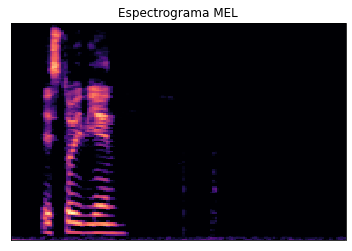

In [ ]:
mel_prueba = librosa.feature.melspectrogram(y=a,sr=s)
mel_prueba.shape
log_mel_prueba = librosa.amplitude_to_db(mel_prueba, ref=np.max)
plt.figure()
librosa.display.specshow(log_mel_prueba, sr = s)
plt.title("Espectrograma MEL")


MFCC del archivo de prueba

Text(0.5, 1.0, 'MFCC prueba')

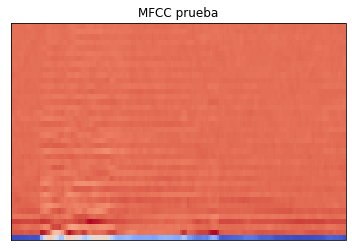

In [ ]:
plt.figure()
mfcc_prueba = librosa.feature.mfcc(y=a,sr=s,n_mfcc=40)
mfcc_prueba.shape

librosa.display.specshow(mfcc_prueba)
plt.title("MFCC prueba")

In [ ]:
path = "/content/drive/MyDrive/Tareas CDSI/Audios_Eva/Audios compañeros/*/*/*.wav"
d_features, d_labels = load_data(path)

In [ ]:
d_features.shape


(270, 180)

In [ ]:
len(d_features[269])

180

In [ ]:
18*15 #total de etiquetas


270

In [ ]:
d_features

array([[-3.83581865e+02,  3.82425745e+01, -1.35864948e+01, ...,
         7.33565052e-05,  6.04566680e-06,  6.77614038e-07],
       [-4.73631262e+02,  1.61701363e+01,  8.09467677e-01, ...,
         3.00697014e-05,  1.92553485e-06,  3.79590931e-08],
       [-3.68518825e+02,  2.76624555e+01, -9.15192100e+00, ...,
         4.49585024e-04,  1.59417342e-05,  2.12745389e-07],
       ...,
       [-4.83051388e+02,  2.87028165e+01,  4.55885814e+00, ...,
         1.21935792e-04,  1.15209516e-05,  1.05239706e-07],
       [-4.65103765e+02,  2.69249517e+01,  8.36202048e+00, ...,
         6.78365247e-05,  4.87308090e-06,  8.66695599e-08],
       [-4.33470673e+02,  2.60349550e+01,  3.37397441e-01, ...,
         7.37022140e-04,  3.89151216e-05,  5.54489377e-07]])

In [ ]:
d_labels #vemos las etiquetas para saber si hay mal etiquetadas y corregirlas, lo cual ocurrió

['Feliz',
 'Feliz',
 'Enojo',
 'Feliz',
 'Triste',
 'Enojo',
 'Triste',
 'Triste',
 'Enojo',
 'Enojo',
 'Feliz',
 'Feliz',
 'Triste',
 'Triste',
 'Enojo',
 'Enojo',
 'Triste',
 'Enojo',
 'Triste',
 'Triste',
 'Feliz',
 'Enojo',
 'Enojo',
 'Triste',
 'Feliz',
 'Enojo',
 'Feliz',
 'Feliz',
 'Feliz',
 'Triste',
 'Feliz',
 'Feliz',
 'Triste',
 'Feliz',
 'Triste',
 'Triste',
 'Enojo',
 'Enojo',
 'Triste',
 'Feliz',
 'Enojo',
 'Enojo',
 'Feliz',
 'Enojo',
 'Triste',
 'Feliz',
 'Feliz',
 'Enojo',
 'Enojo',
 'Enojo',
 'Enojo',
 'Triste',
 'Feliz',
 'Feliz',
 'Enojo',
 'Triste',
 'Feliz',
 'Triste',
 'Triste',
 'Triste',
 'Enojo',
 'Feliz',
 'Enojo',
 'Feliz',
 'Triste',
 'Feliz',
 'Enojo',
 'Feliz',
 'Triste',
 'Triste',
 'Triste',
 'Triste',
 'Feliz',
 'Enojo',
 'Enojo',
 'Triste',
 'Feliz',
 'Triste',
 'Triste',
 'Enojo',
 'Triste',
 'Feliz',
 'Enojo',
 'Feliz',
 'Feliz',
 'Enojo',
 'Feliz',
 'Triste',
 'Enojo',
 'Enojo',
 'Triste',
 'Triste',
 'Feliz',
 'Enojo',
 'Enojo',
 'Triste',
 'Feliz

In [ ]:
len(d_labels)

270

###Dividir el conjunto en entrenamiento (train) y prueba (validation)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(d_features, d_labels, test_size = 0.20 , random_state = 0)

###Escalado de variables

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

###Clasificadores

###SVM

In [ ]:
from sklearn.svm import SVC
classifier_svm = SVC(kernel = 'linear').fit(X_train, Y_train)
svm_predictions = classifier_svm.predict(X_test)


Elaboramos una matriz de confusión







In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

cm = confusion_matrix(Y_test,svm_predictions)
cm

array([[ 8,  0,  5],
       [ 4, 14,  8],
       [ 1,  4, 10]])

In [ ]:
print(accuracy_score(Y_test,y_pred=svm_predictions))
print(classification_report(Y_test,svm_predictions))

0.5925925925925926
              precision    recall  f1-score   support

       Enojo       0.62      0.62      0.62        13
       Feliz       0.78      0.54      0.64        26
      Triste       0.43      0.67      0.53        15

    accuracy                           0.59        54
   macro avg       0.61      0.61      0.59        54
weighted avg       0.64      0.59      0.60        54



Matriz de confusión

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


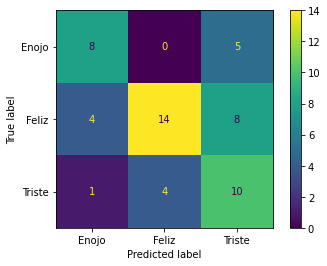

In [ ]:
plot_confusion_matrix(classifier_svm, X_test, Y_test)
plt.show()

Aplicamos K-fold cross validation

In [ ]:
from sklearn.model_selection import cross_val_score


K-fold cross validation para SVM

In [ ]:
accuracies = cross_val_score(estimator = classifier_svm, X = X_train, y = Y_train, cv = 10)

In [ ]:
accuracies

array([0.63636364, 0.40909091, 0.59090909, 0.63636364, 0.63636364,
       0.31818182, 0.52380952, 0.38095238, 0.66666667, 0.61904762])

In [ ]:
accuracies.mean()

0.5417748917748918

###Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 100, criterion="entropy", random_state= 0)
classifier_rf.fit(X_train, Y_train)
rf_predictions = classifier_rf.predict(X_test)

In [ ]:
print(accuracy_score(Y_test,y_pred=rf_predictions))
print(classification_report(Y_test, rf_predictions))
# creating a confusion matrix
print(confusion_matrix(Y_test, rf_predictions) )

0.6111111111111112
              precision    recall  f1-score   support

       Enojo       0.52      0.85      0.65        13
       Feliz       1.00      0.38      0.56        26
      Triste       0.52      0.80      0.63        15

    accuracy                           0.61        54
   macro avg       0.68      0.68      0.61        54
weighted avg       0.75      0.61      0.60        54

[[11  0  2]
 [ 7 10  9]
 [ 3  0 12]]


Matriz de confusión

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


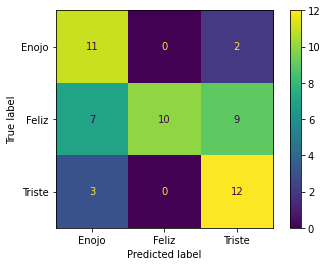

In [ ]:
plot_confusion_matrix(classifier_rf, X_test, Y_test)
plt.show()

K-fold cross validation para RandomForest

In [ ]:
accuracies1 = cross_val_score(estimator = classifier_rf, X = X_train, y = Y_train, cv = 10)

In [ ]:
accuracies1

array([0.59090909, 0.59090909, 0.54545455, 0.77272727, 0.68181818,
       0.63636364, 0.61904762, 0.66666667, 0.57142857, 0.66666667])

In [ ]:
accuracies1.mean()

0.6341991341991342

In [ ]:
!pip install gtts



# Aquí se usan los modelos entrenados para realizar inferencias sobre los datos externos

###Importando y evaluando un audio de prueba

In [ ]:
from gtts import gTTS
from IPython.display import Audio

In [ ]:
probando="Esto es una prueba"
language = "es-us"
speech = gTTS(text = probando, lang = language, slow = False)

In [ ]:
speech.save("P.mp3")
speech_file = "P.mp3"

In [ ]:
Audio(speech_file,autoplay= False)


Importando audio de prueba

In [ ]:
voice_ex = "/content/drive/MyDrive/Tareas CDSI/Audios_Eva/Audios_externos/Adultos/Triste_Andy.wav"
x,ex_s = librosa.load(voice_ex)
IPython.display.Audio(voice_ex)

In [ ]:
caract_voice = extr_feat(voice_ex, mfcc=True, chroma=True, mel=True)
caract_voice = np.expand_dims(caract_voice, axis=0)
prediccion = classifier_rf.predict(caract_voice)

Clasificación según Random Forest

In [ ]:
prediccion[0]

'Feliz'

In [ ]:
predic = "Creo que estás" + prediccion[0]
speech_pred = gTTS(text = predic, lang = language, slow = True)
speech_pred.save("Pr.mp3")
speech_file_pred = "Pr.mp3"

In [ ]:
IPython.display.Audio(speech_file_pred)

In [ ]:
prediccion1 = classifier_svm.predict(caract_voice)

In [ ]:
prediccion1[0]

'Feliz'

###Evaluación con RandomForest y SVM

Evaluación de niños con RandomForest

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


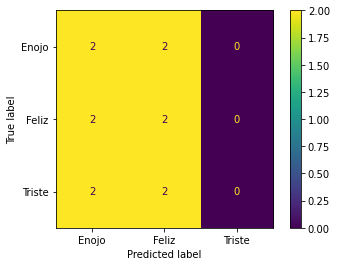

In [ ]:
path_rec = "/content/drive/MyDrive/Tareas CDSI/Audios_Eva/Audios_externos/Niños/*.wav"
Xn, Yn = load_data(path_rec)
plot_confusion_matrix(classifier_rf,Xn,Yn)

Evaluacuón de niños con SVM

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


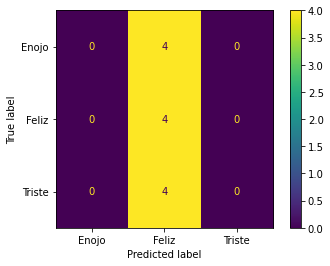

In [ ]:
plot_confusion_matrix(classifier_svm,Xn,Yn)

Evaluación de adultos con RandomForest usando la matriz de confusión

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


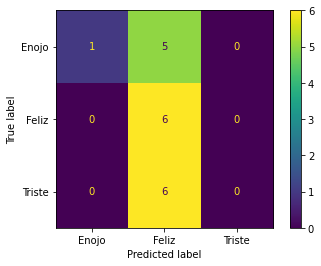

In [ ]:
path_rec_a = "/content/drive/MyDrive/Tareas CDSI/Audios_Eva/Audios_externos/Adultos/*.wav"
Xa, Ya = load_data(path_rec_a)
plot_confusion_matrix(classifier_rf,Xa,Ya)

Evaluación de adultos con SVM usando la matriz de confusión

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


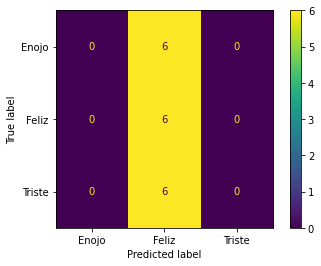

In [ ]:
plot_confusion_matrix(classifier_svm,Xa,Ya)